# Census Income Dataset

The ICS dataset link is: https://archive.ics.uci.edu/ml/datasets/adult

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

## Columns
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, - Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, accuracy_score, classification_report

In [7]:
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'predclass']

train_df = pd.read_csv('data/adult.data', header=None, names=headers, sep=',\s', na_values=["?"], engine='python')
test_df = pd.read_csv('data/adult.test', header=None, names=headers, sep=',\s', na_values=["?"], engine='python', skiprows=1)

In [8]:
data = train_df.append(test_df)
data.reset_index(inplace = True)
data.drop('index', inplace=True, axis=1)

In [9]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [10]:
data.shape

(48842, 15)

In [11]:
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country predclass  
0          2174             0              40  United-States     <=50K  
1             0             0              13  United-States     <=50K  
2             0             0              40  United-States     <=50K  
3             0             0              40  United-States     <=50K  
4             0             0              40           Cuba     <=50K

## Visualizing which features are important
Feature Selection

Most of the workers are of private class. Important for classification

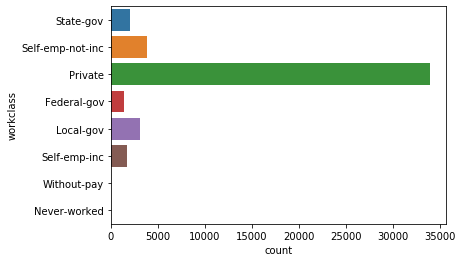

In [12]:
sns.countplot(y="workclass", data=data)

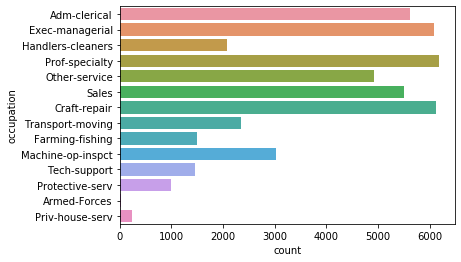

In [13]:
sns.countplot(y="occupation", data=data)

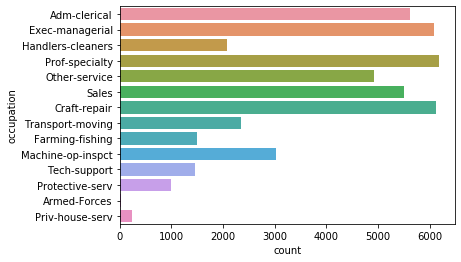

In [14]:
sns.countplot(y="occupation", data=data)

This shows that most of the values in native-country are of USA. Important for classification

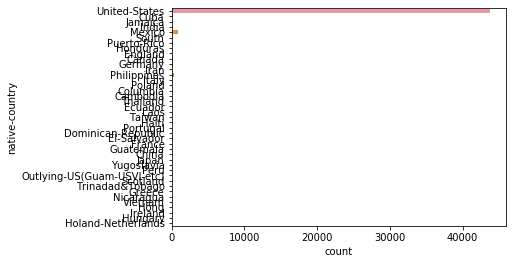

In [15]:
sns.countplot(y="native-country", data=data)

mostly workers work for 40 hrs per week.

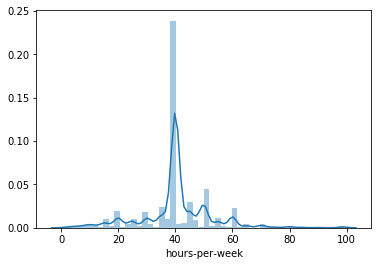

In [16]:
sns.distplot(data['hours-per-week'])

## Data

### Encoding

In [20]:
ohc = data.columns.tolist()
ohc.remove('predclass')
data_enc = pd.get_dummies(data, columns=ohc)

data_enc.head()

predclass  age_17  age_18  age_19  age_20  age_21  age_22  age_23  age_24  \
0     <=50K       0       0       0       0       0       0       0       0   
1     <=50K       0       0       0       0       0       0       0       0   
2     <=50K       0       0       0       0       0       0       0       0   
3     <=50K       0       0       0       0       0       0       0       0   
4     <=50K       0       0       0       0       0       0       0       0   

   age_25  ...  native-country_Portugal  native-country_Puerto-Rico  \
0       0  ...                        0                           0   
1       0  ...                        0                           0   
2       0  ...                        0                           0   
3       0  ...                        0                           0   
4       0  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 29031 columns]

In [19]:
data_le = data.apply(LabelEncoder().fit_transform)

data_le.head()

predclass  age_17  age_18  age_19  age_20  age_21  age_22  age_23  age_24  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   

   age_25  ...  native-country_Portugal  native-country_Puerto-Rico  \
0       0  ...                        0                           0   
1       0  ...                        0                           0   
2       0  ...                        0                           0   
3       0  ...                        0                           0   
4       0  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 29031 columns]

Checking the important features

In [21]:
clf = RandomForestClassifier()
clf.fit(data_le.drop('predclass', axis=1), data_le['predclass'])

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('predclass', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh');

Picking the important features

In [24]:
pca=PCA(n_components=2).fit(data_enc.drop('predclass', axis=1).dropna())

X = pca.transform(data_enc.drop('predclass', axis=1))

In [29]:
X

array([[ 0.41989875, -0.52016862],
       [-1.21077066, -0.74262125],
       [ 0.23417389,  1.17683506],
       ...,
       [-1.11479706, -0.71490436],
       [ 0.25443111, -0.35858079],
       [-1.2109335 , -0.75802221]])

In [30]:
X.shape

(48842, 2)

In [37]:
X[:, 0].shape, X[:, 1].shape

((48842,), (48842,))

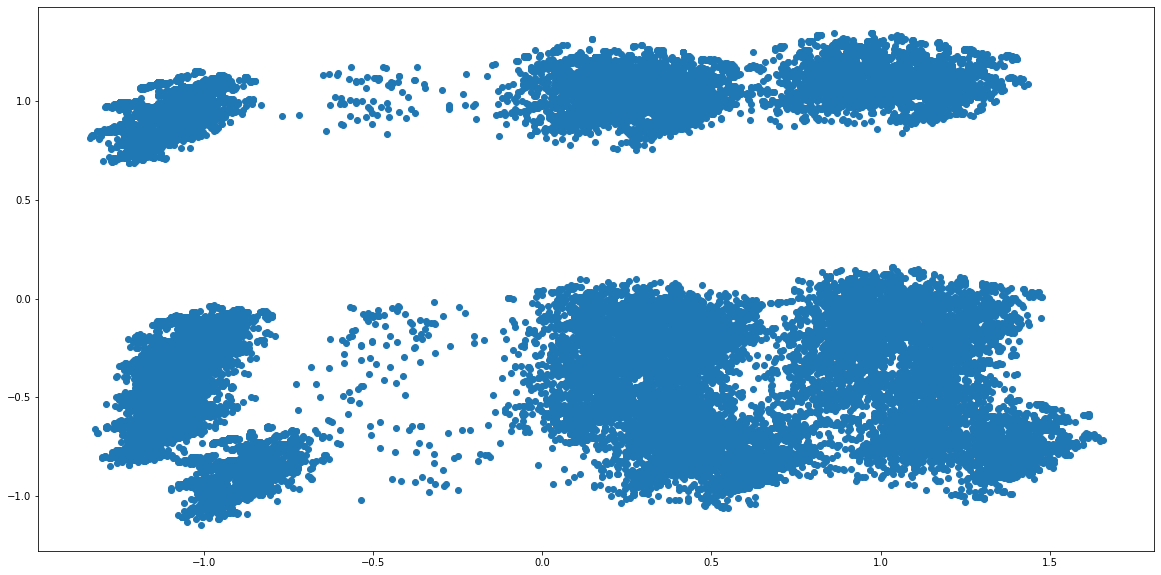

In [39]:
plt.rcParams["figure.figsize"] = (20, 10)

plt.scatter(X[:, 0], X[:, 1])

In [87]:
y = data_enc['predclass'].dropna()

y_enc=LabelEncoder().fit_transform(y)

In [88]:
y.shape, y_enc.shape

((48842,), (48842,))

In [89]:
X_train = X
y_train = y_enc.astype('int64')

In [90]:
X_train.shape, y_train.shape

((48842, 2), (48842,))

Plotting ROC

In [91]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Logistic Regression

In [101]:
lr = LogisticRegression(n_jobs = -1).fit(X_train, y_train)

y_pred = lr.predict(X_train)
y_prob = lr.predict_proba(X_train)[:,1]

acc = round(accuracy_score(y_train, y_pred) * 100, 2)

In [102]:
y_pred

array([0, 2, 0, ..., 2, 0, 2], dtype=int64)

In [103]:
y_prob

array([0.28575307, 0.12432165, 0.31456805, ..., 0.1357947 , 0.28111427,
       0.12348389])

In [104]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.69     24720
           1       0.00      0.00      0.00     12435
           2       0.40      0.52      0.45      7841
           3       0.00      0.00      0.00      3846

    accuracy                           0.53     48842
   macro avg       0.24      0.35      0.29     48842
weighted avg       0.35      0.53      0.42     48842



## Naive Bayes

In [105]:
nb = GaussianNB().fit(X_train, y_train)

y_pred = nb.predict(X_train)
y_prob = nb.predict_proba(X_train)[:,1]

acc = round(accuracy_score(y_train, y_pred) * 100, 2)

In [106]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68     24720
           1       0.00      0.00      0.00     12435
           2       0.34      0.58      0.43      7841
           3       0.00      0.00      0.00      3846

    accuracy                           0.51     48842
   macro avg       0.23      0.35      0.28     48842
weighted avg       0.35      0.51      0.41     48842



In [107]:
y_pred

array([0, 2, 0, ..., 2, 0, 2], dtype=int64)

In [108]:
y_prob

array([0.29201802, 0.12078468, 0.3200529 , ..., 0.12686029, 0.27942087,
       0.12054835])